## Multivariate normal distribution

In [1]:
import mnist_utils as utils;
import numpy as np;
import scipy.stats as st;
import sklearn.metrics as mt;
%matplotlib inline

In [2]:
# Importing training data
trainD, trainL = utils.loadset("../data/train-images.idx3-ubyte", "../data/train-labels.idx1-ubyte");
# Importing test data
testD, testL = utils.loadset("../data/t10k-images.idx3-ubyte", "../data/t10k-labels.idx1-ubyte");

#### Calculating mean for every digit

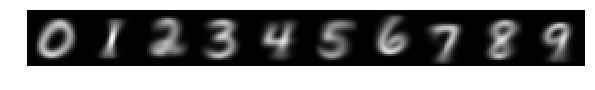

In [3]:
# Get list of all images per digit
digits = np.array(list(map(lambda d: utils.getalldigits(d, trainD, trainL), np.arange(10))));
# Calculate means per digit
means = np.array([np.mean(digits[i], axis = 0) for i in range(len(digits))])
# Display mean for every digit
utils.showimgset(means, y = 1);

#### Classifying with identity matrix as covariance matrix

In [4]:
# Creating distributions for every digit's mean
distributions = [st.multivariate_normal(
    mean = means[i].flatten(),
    cov = 1,
    allow_singular=True
) for i in range(len(digits))];

In [5]:
# Initializing empty result list
rslt = [];
# Classifying test data
for tl in zip(testD, testL):
    # Label data as digit of the distribution with the highest probability
    rslt += [[tl[1], np.argmax(list(map(lambda n: n.logpdf(tl[0].flatten()), distributions)))]];
# Convert result to numpy array for slicing
rslt = np.array(rslt);

Zero-one-loss: 0.179700 
Confusion Matrix:


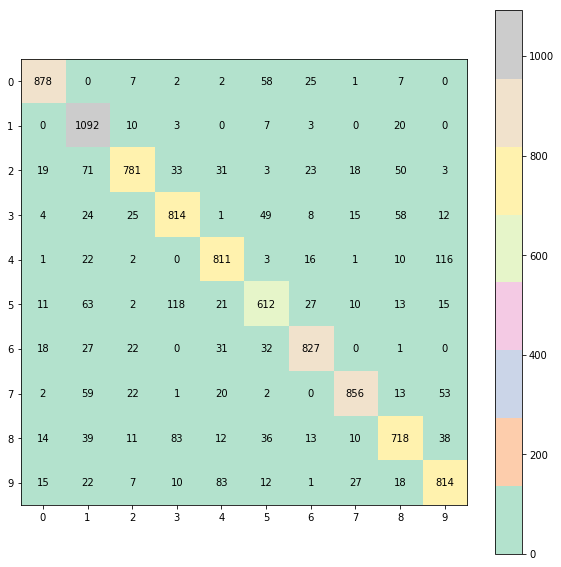

In [6]:
# Calculate confusion matrix
cm = mt.confusion_matrix(list(rslt[:,0]), list(rslt[:,1]));
# Display confusion matrix
utils.showconfmatrix(cm, np.arange(10));
# Calculate zero one loss
zol = mt.zero_one_loss(list(rslt[:,0]), list(rslt[:,1]));
print("Zero-one-loss: {0:2.6f} \r\nConfusion Matrix:".format(zol));